### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network 
* writeup_report.pdf summarizing the results

#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing 
```sh
python drive.py model.h5
```


#### 3. Submission code is usable and readable

The model.py file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

In [5]:
import cv2
import csv
from sklearn.utils import shuffle
import numpy as np

#Reading the csv file line by line and storing it into list "lines".
lines=[]
with open('/home/carnd/CarND-Behavioral-Cloning/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)


#This function generates data
def generator(samples, batch_size=32):
    while 1:
        shuffle(samples)
        for batch in range(1, len(lines), batch_size):
            batch_samples = lines[batch:batch+batch_size]
            images=[]
            steering=[]
            for line in batch_samples:
                #c_dir_path = line[0].split()
                image_path = '/home/carnd/CarND-Behavioral-Cloning/data/' + line[0].strip()
                image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
                images.append(image)
                steer=float(line[3])
                steering.append(steer)
                
                images.append(cv2.flip(image,1))
                steering.append(steer*-1)
                
                #images.append(cv2.add(cv2.multiply(image, np.array([1.5])), np.array([50.0])))
                #steering.append(steer)

                
                image_path = '/home/carnd/CarND-Behavioral-Cloning/data/' + line[1].strip()
                image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
                
                images.append(image)
                steerl = steer + 0.245
                steering.append(steerl)
                
                images.append(cv2.flip(image,1))
                steering.append(steerl*-1)
                
                #images.append(cv2.add(cv2.multiply(image, np.array([1.5])), np.array([50.0])))
                #steering.append(steer)
                #print('left done')

                #r_dir_path = line[2].split()
                image_path = '/home/carnd/CarND-Behavioral-Cloning/data/' + line[2].strip()
                image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
                
                images.append(image)
                steerR = steer - 0.245
                steering.append(steerR)
                
                images.append(cv2.flip(image,1))
                steering.append(steerR*-1)
                
                #images.append(cv2.add(cv2.multiply(image, np.array([1.5])), np.array([50.0])))
                #steering.append(steer)
                #print('Right done')
               

            X_train = np.array(images)
            y_train = np.array(steering)
            #print(len(X_train), len(y_train))
            yield shuffle(X_train,y_train)

In [6]:
#Generating data
Xtrain_generator = generator(train_samples, batch_size=32)
ytrain_generator = generator(validation_samples, batch_size=32)

### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

My model is a edited version of NVIDIA architecture which consists of 5 convolutional layers followed by 4 fully connected layers.

The first 3 convolutional layers has the 5x5 filter size and the depth of 24, 36 and 48 respectively.

The above layers are followed by 2 more convolutional layers has the 3x3 filter size and the depth of 64 each.

The last 4 layers are fully connected layers with the depth of 100, 50, 10 and 1.

#### 2. Attempts to reduce overfitting in the model

The model contains dropout layer with keep_prob = 0.2 in order to reduce overfitting.

The model was trained and validated on different data sets to ensure that the model was not overfitting. The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually.

#### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center camera images, left camera images and right camera images to have a large set of data with different viewing angles so the car can drive better.

Furthermore, i have flipped the images taken from all the three cameras to generallize my model and to restrict it from getting biased towards a particular direction(left or right). The other advantage is, we have more data to feed to the network from which it can learn more.

### Model Architecture and Training Strategy

#### 1. Solution Design Approach

First i went with LeNET architecture, it do performed well but no. of epochs it took were more and the loss decrease percentage wasn't satisfiable. 

Then i tried NVIDIA architecture by tweaking it's depth on fully connected layers and adding "Relu" activation function with dropout to avoid overfitting.

Then i saved the model.h5 file and ran it on the simulator and BOOOMMM!! It worked. 


#### 3. Creation of the Training Set & Training Process

Because of the hardware limitaion that i've on my machine, i wasn't able to record the data properly so i went with the Udacity data.

I then preprocessed this data by  normalizing it to have zero mean and equal variance. Then i flipped the images and accordingly adjusted the steering angle by multiplying it with -1.


I finally randomly shuffled the data set and put 20% of the data into a validation set. 

I used this training data for training the model. The validation set helped determine if the model was over or under fitting. The ideal number of epochs was 5 as evidenced by decrease in the loss rate, I used an adam optimizer so that manually training the learning rate wasn't necessary.

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_4 (Cropping2D)        (None, 75, 320, 3)    0           cropping2d_input_4[0][0]         
____________________________________________________________________________________________________
lambda_4 (Lambda)                (None, 75, 320, 3)    0           cropping2d_4[0][0]               
____________________________________________________________________________________________________
convolution2d_16 (Convolution2D) (None, 36, 158, 24)   1824        lambda_4[0][0]                   
____________________________________________________________________________________________________
convolution2d_17 (Convolution2D) (None, 16, 77, 36)    21636       convolution2d_16[0][0]           
___________________________________________________________________________________________

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


8088/8037 [==============================] - 16s - loss: 0.0580 - val_loss: 0.0451
Epoch 2/5
8064/8037 [==============================] - 16s - loss: 0.0452 - val_loss: 0.0266
Epoch 3/5
8064/8037 [==============================] - 16s - loss: 0.0253 - val_loss: 0.0149
Epoch 4/5
8064/8037 [==============================] - 16s - loss: 0.0428 - val_loss: 0.0399
Epoch 5/5
8064/8037 [==============================] - 16s - loss: 0.0276 - val_loss: 0.0372


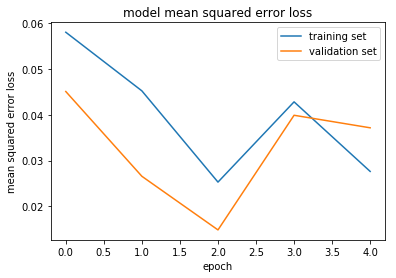

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Cropping2D, Lambda
import matplotlib.pyplot as plt
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout

#Model
model = Sequential()

#Cropping images and Normalizing
model.add(Cropping2D(cropping=((60,25), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/127.5 - 1.0))

#Convolutional layers
model.add(Convolution2D(24,5,5, subsample=(2,2) ,activation = "relu"))
model.add(Convolution2D(36,5,5, subsample=(2,2) ,activation = "relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2) ,activation = "relu"))
model.add(Convolution2D(64,3,3,activation = "relu"))
model.add(Convolution2D(64,3,3,activation = "relu"))

#Fully connected layers
model.add(Flatten())
model.add(Dense(100,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(50,activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1))

#Displaying model summary
model.summary()

#Running the model
model.compile(loss = 'mse', optimizer = 'adam')
history_object = model.fit_generator(Xtrain_generator, samples_per_epoch=len(lines), \
                validation_data = ytrain_generator, nb_val_samples=len(validation_samples), nb_epoch=5, verbose=1)

#Plotting of error with each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

#Saving the model
model.save('model.h5')

### Limitation

I doubt the performance of this model as it's not generalized and doesn't perform well on the second track.

### Solution

What i think is augmenting the data to create a large dataset to train the model plus adding the bottle neck data from the different model and training this model via transfer learning might help. 

Gonna try that.  :)